## Data Import and Setup

Importing essential libraries for data analysis:
- pandas: For data manipulation
- matplotlib & seaborn: For visualization
- json: For reading JSON data
- re: For text processing

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Loading and DataFrame Creation

Loading recipe data from JSON file:
- Reading merged recipe data from 'merged_recipes.json'
- Converting JSON structure to pandas DataFrame for analysis

In [5]:
# Load the merged JSON file
with open('merged_recipes.json', 'r', encoding='utf-8') as f:
    merged_data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(merged_data)

## Time Conversion Function

Helper function to standardize recipe time formats:
- Converts various time formats to minutes
- Handles 'PT' format (ISO duration)
- Processes 'mins' format
- Returns 0 for missing/invalid values

In [6]:
# Function to convert time to minutes
def convert_time_to_minutes(time_str):
    if pd.isna(time_str) or time_str == '-':
        return 0
    
    # Handle "PT" format
    if 'PT' in str(time_str):
        hours = 0
        minutes = 0
        if 'H' in time_str:
            hours = int(re.search(r'PT(\d+)H', time_str).group(1))
        if 'M' in time_str:
            minutes = int(re.search(r'(\d+)M', time_str).group(1))
        return hours * 60 + minutes
    
    # Handle "X mins" format
    if 'mins' in str(time_str):
        return int(re.search(r'(\d+)', time_str).group(1))
    
    return 0

## Nutritional Data Visualization

Converting and visualizing caloric distribution:
- Converts nutritional values to numeric format
- Creates histogram of calorie distribution
- Limited to 1750 kcal for better visualization
- Shows frequency of recipes across calorie ranges

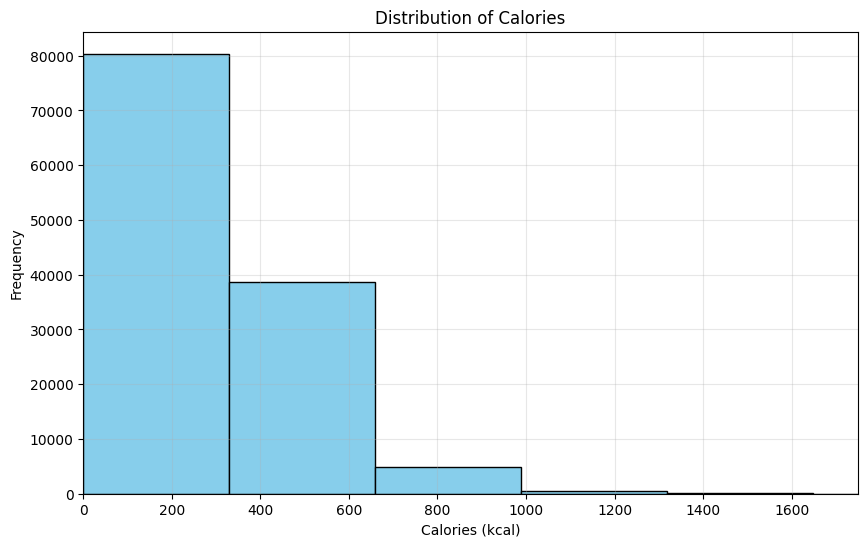

In [7]:
# Convert calories, fat, protein, and carbohydrate to numeric
numeric_columns = ['calories', 'fat', 'protein', 'carbohydrate']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Now for the calorie distribution plot you shared:
plt.figure(figsize=(10, 6))
plt.hist(df['calories'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.xlim(0, 1750)
plt.title('Distribution of Calories')
plt.xlabel('Calories (kcal)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## Macronutrient Distribution Analysis

Visualizing distribution of key macronutrients:
- Fat: Range 0-100g (green histogram)
- Protein: Range 0-100g (coral histogram)
- Carbohydrates: Range 0-250g (purple histogram)

Each plot shows frequency distribution with consistent formatting and grid lines for easy comparison.

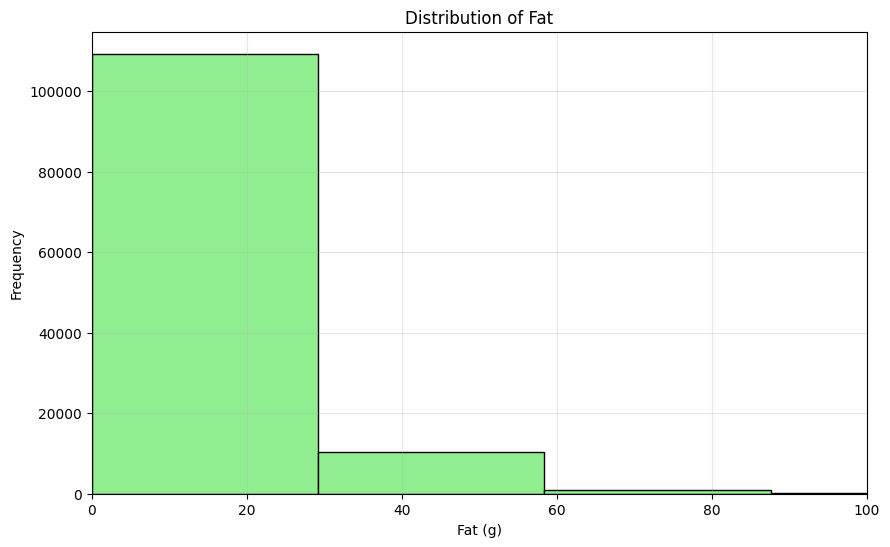

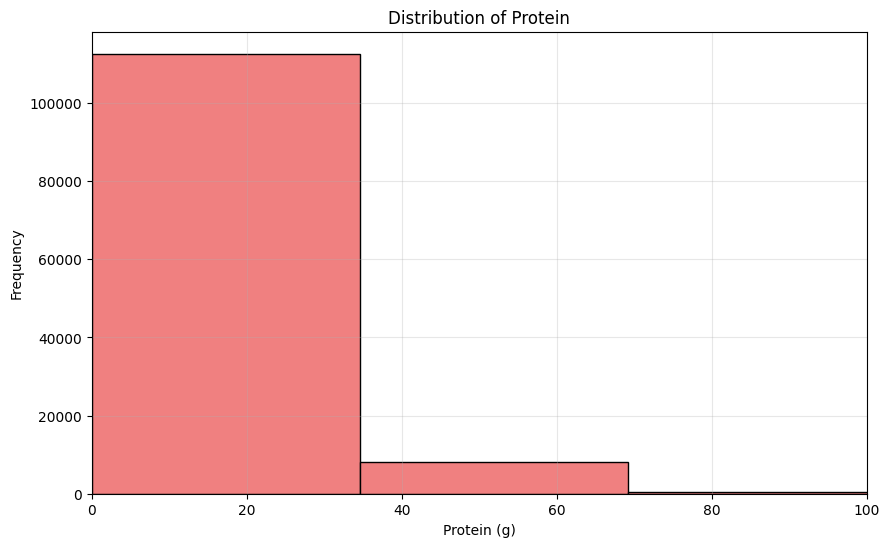

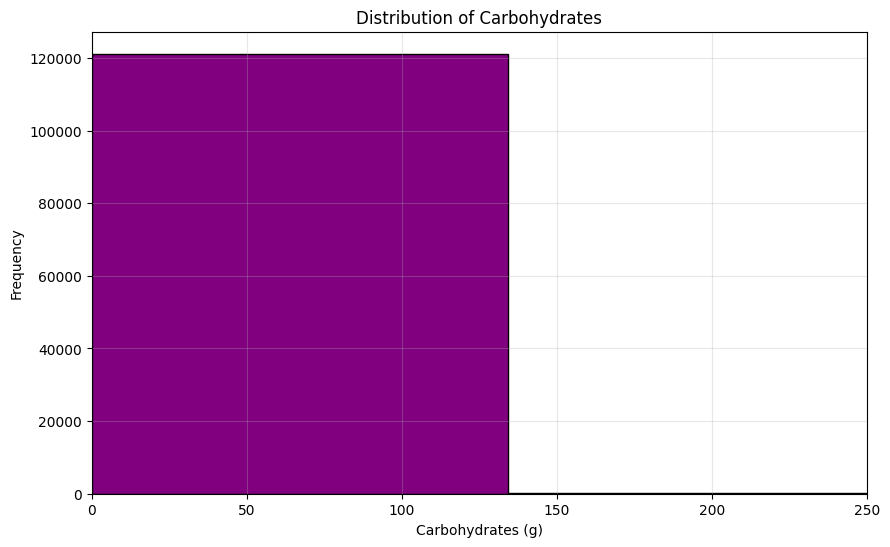

In [8]:
# Fat Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['fat'].dropna(), bins=15, edgecolor='black', color='lightgreen')
plt.xlim(0, 100)
plt.title('Distribution of Fat')
plt.xlabel('Fat (g)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Protein Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['protein'].dropna(), bins=15, edgecolor='black', color='lightcoral')
plt.xlim(0, 100)
plt.title('Distribution of Protein')
plt.xlabel('Protein (g)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Carbohydrate Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['carbohydrate'].dropna(), bins=15, edgecolor='black', color='purple')
plt.xlim(0, 250)
plt.title('Distribution of Carbohydrates')
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

Number of recipes: 121373
Mean carbohydrates: 33.7g
Median carbohydrates: 30.0g
Min carbohydrates: 0.0g
Max carbohydrates: 2012.0g


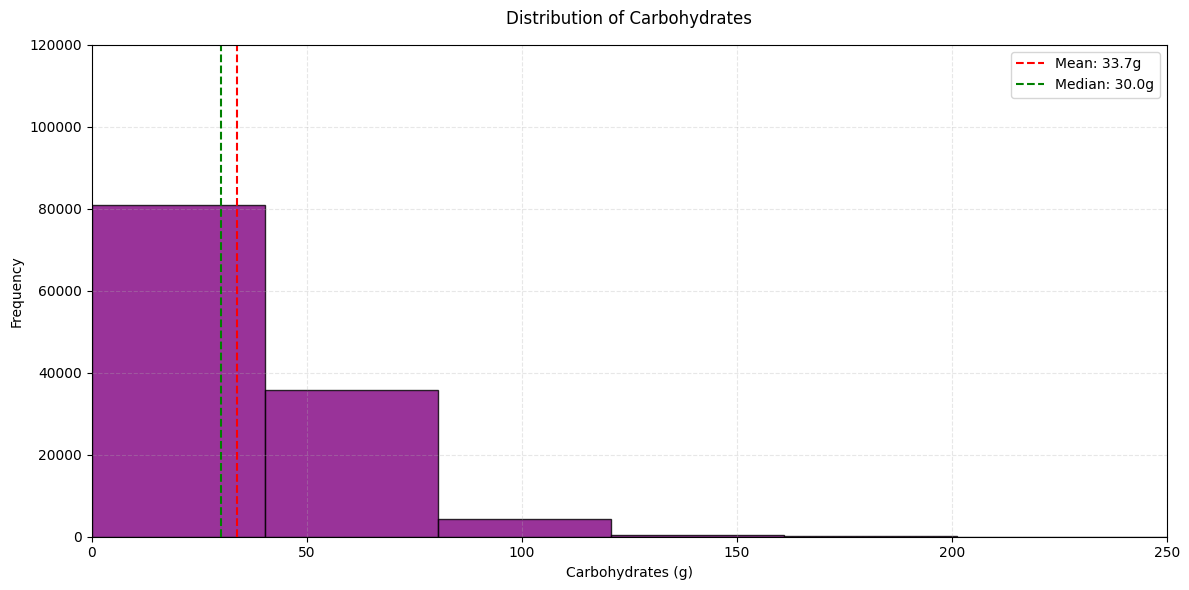

In [9]:
plt.figure(figsize=(12, 6))

# Create histogram with adjusted parameters
plt.hist(df['carbohydrate'].dropna(), 
         bins=50,  # Increased bins for more detail
         edgecolor='black', 
         color='purple',
         alpha=0.8)

# Set axis limits
plt.xlim(0, 250)
plt.ylim(0, 120000)  # Adjust if needed based on your data

# Add title and labels
plt.title('Distribution of Carbohydrates', pad=15, fontsize=12)
plt.xlabel('Carbohydrates (g)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add mean and median lines for reference
mean_carb = df['carbohydrate'].mean()
median_carb = df['carbohydrate'].median()
plt.axvline(mean_carb, color='red', linestyle='--', label=f'Mean: {mean_carb:.1f}g')
plt.axvline(median_carb, color='green', linestyle='--', label=f'Median: {median_carb:.1f}g')

# Add legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Optional: Print summary statistics
print(f"Number of recipes: {len(df['carbohydrate'].dropna())}")
print(f"Mean carbohydrates: {mean_carb:.1f}g")
print(f"Median carbohydrates: {median_carb:.1f}g")
print(f"Min carbohydrates: {df['carbohydrate'].min():.1f}g")
print(f"Max carbohydrates: {df['carbohydrate'].max():.1f}g")

plt.show()

## Recipe Time Analysis

Processing and visualizing recipe preparation and cooking times:

Data Processing:
- Converts ISO time format (PT1H30M) to minutes
- Handles both hours and minutes components
- Manages missing/invalid data

Visualizations:
1. Preparation Time:
   - Range: 0-120 minutes (2 hours)
   - Orange histogram showing frequency distribution
   
2. Cooking Time:
   - Range: 0-180 minutes (3 hours)
   - Brown histogram showing frequency distribution

Both plots use 30 bins for detailed distribution view.

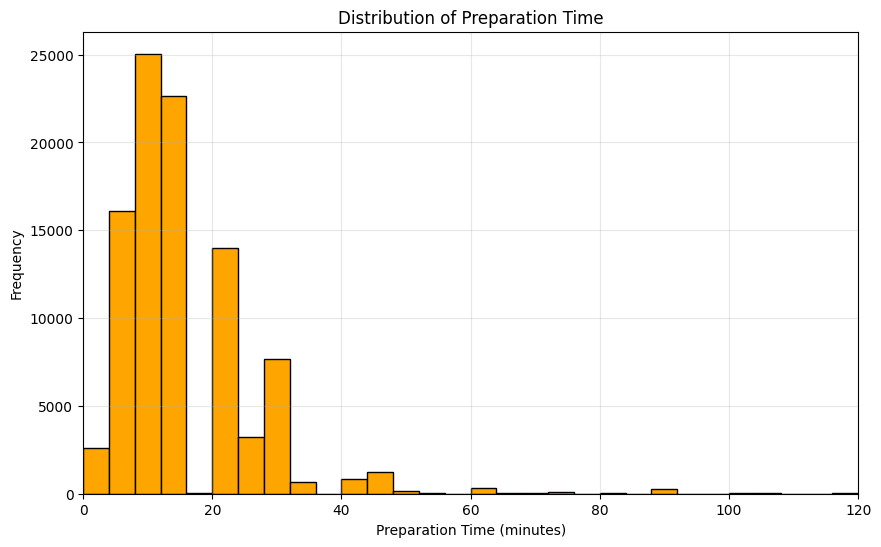

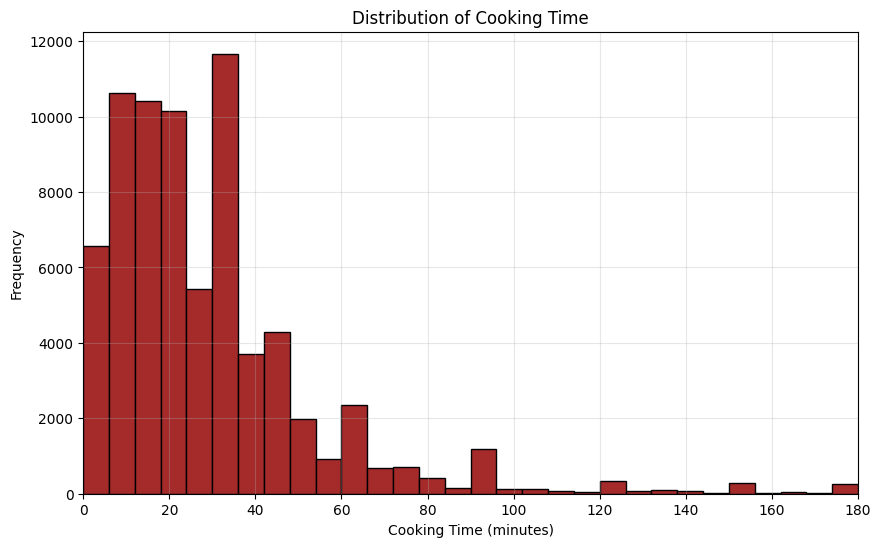

In [10]:
# Convert prep_time and cook_time from ISO format to minutes
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    try:
        hours = int(time_str.split('H')[0].split('T')[1]) if 'H' in time_str else 0
        minutes = int(time_str.split('H')[1].split('M')[0]) if 'H' in time_str else int(time_str.split('T')[1].split('M')[0])
        return hours * 60 + minutes
    except:
        return None

# Convert times to minutes
df['prep_time_minutes'] = df['prep_time'].apply(convert_time_to_minutes)
df['cook_time_minutes'] = df['cook_time'].apply(convert_time_to_minutes)


# Convert prep_time and cook_time from ISO format to minutes
def convert_time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    try:
        hours = int(time_str.split('H')[0].split('T')[1]) if 'H' in time_str else 0
        minutes = int(time_str.split('H')[1].split('M')[0]) if 'H' in time_str else int(time_str.split('T')[1].split('M')[0])
        return hours * 60 + minutes
    except:
        return None

# Convert times to minutes
df['prep_time_minutes'] = df['prep_time'].apply(convert_time_to_minutes)
df['cook_time_minutes'] = df['cook_time'].apply(convert_time_to_minutes)

# Preparation Time Distribution with adjusted parameters
plt.figure(figsize=(10, 6))
plt.hist(df['prep_time_minutes'].dropna(), 
         bins=30,  # increased number of bins
         edgecolor='black', 
         color='orange',
         range=(0, 120))  # limit to 2 hours (120 minutes) for better visualization
plt.xlim(0, 120)  # x-axis limit to 2 hours
plt.title('Distribution of Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Cooking Time Distribution with adjusted parameters
plt.figure(figsize=(10, 6))
plt.hist(df['cook_time_minutes'].dropna(), 
         bins=30,
         edgecolor='black', 
         color='brown',
         range=(0, 180))  # limit to 3 hours (180 minutes) for better visualization
plt.xlim(0, 180)  # x-axis limit to 3 hours
plt.title('Distribution of Cooking Time')
plt.xlabel('Cooking Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()



# # Cooking Time Distribution
# plt.figure(figsize=(10, 6))
# plt.hist(df['cook_time_minutes'].dropna(), bins=20, edgecolor='black', color='brown')
# plt.xlim(0, 1000)
# plt.title('Distribution of Cooking Time')
# plt.xlabel('Cooking Time (minutes)')
# plt.ylabel('Frequency')
# plt.grid(True, alpha=0.3)
# plt.show()

In [11]:
# # 2. Time Distributions
# plot_distribution(df, 'prep_time_minutes', 'Distribution of Preparation Times', 'Preparation Time (minutes)', 'orange')
# plot_distribution(df, 'cook_time_minutes', 'Distribution of Cooking Times', 'Cooking Time (minutes)', 'pink')

## User Feedback Analysis

Analyzing recipe ratings and review patterns:

1. Rating Distribution:
   - Teal histogram showing rating frequency
   - Shows how recipes are rated (1-5 scale)
   - Helps identify common rating patterns

2. Review Count Distribution:
   - Magenta histogram limited to 1000 reviews
   - Shows how many reviews recipes typically receive
   - Identifies highly-reviewed vs rarely-reviewed recipes

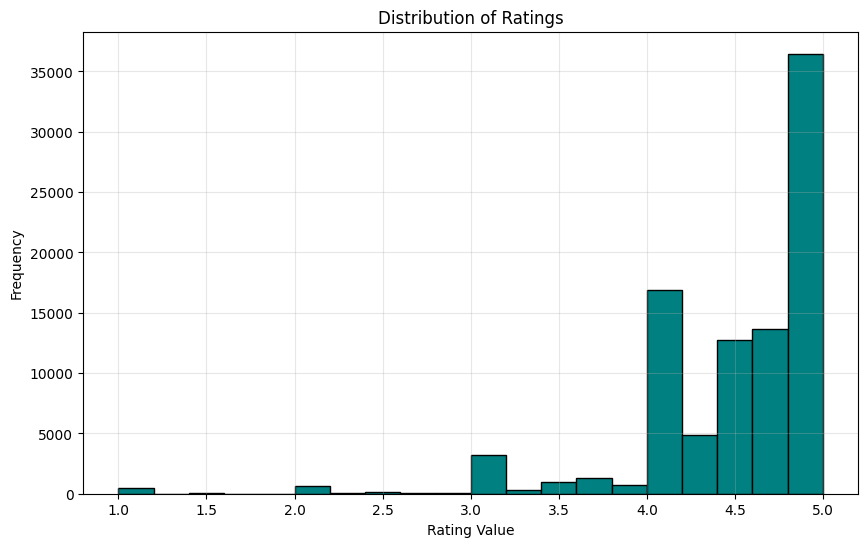

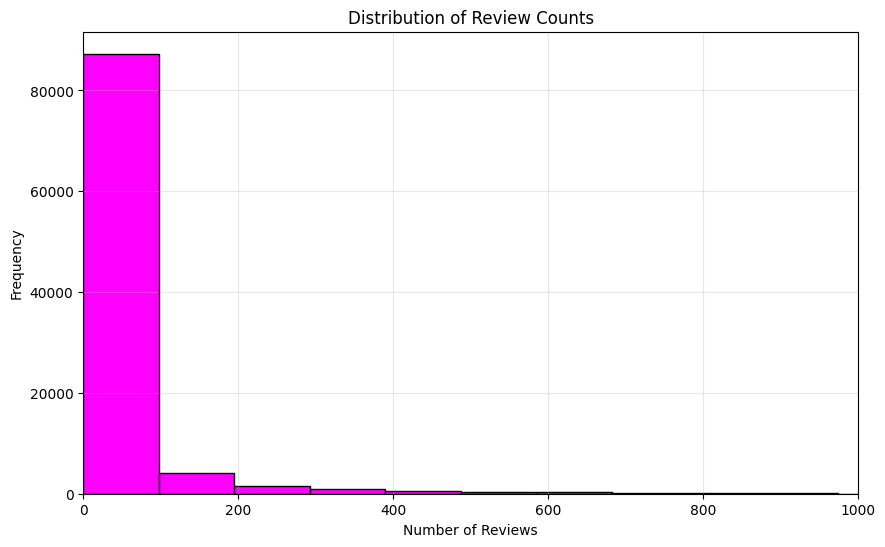

In [12]:
# Convert rating to numeric if it's not already
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce')

# Rating Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), 
         bins=20, 
         edgecolor='black', 
         color='teal')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Review Count Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['review_count'].dropna(), 
         bins=30, 
         edgecolor='black', 
         color='magenta')
plt.xlim(0, 1000)
plt.title('Distribution of Review Counts')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

## Top Recipe Categories Analysis

Visualizing most common recipe categories:
- Shows top 20 categories by recipe count
- Horizontal bar plot for better readability
- Categories sorted by frequency
- Clear view of recipe distribution across categories

Key Features:
- Horizontal orientation for better category label visibility
- Sky blue bars for clean visualization
- Adjusted figure size (15x8) for optimal display

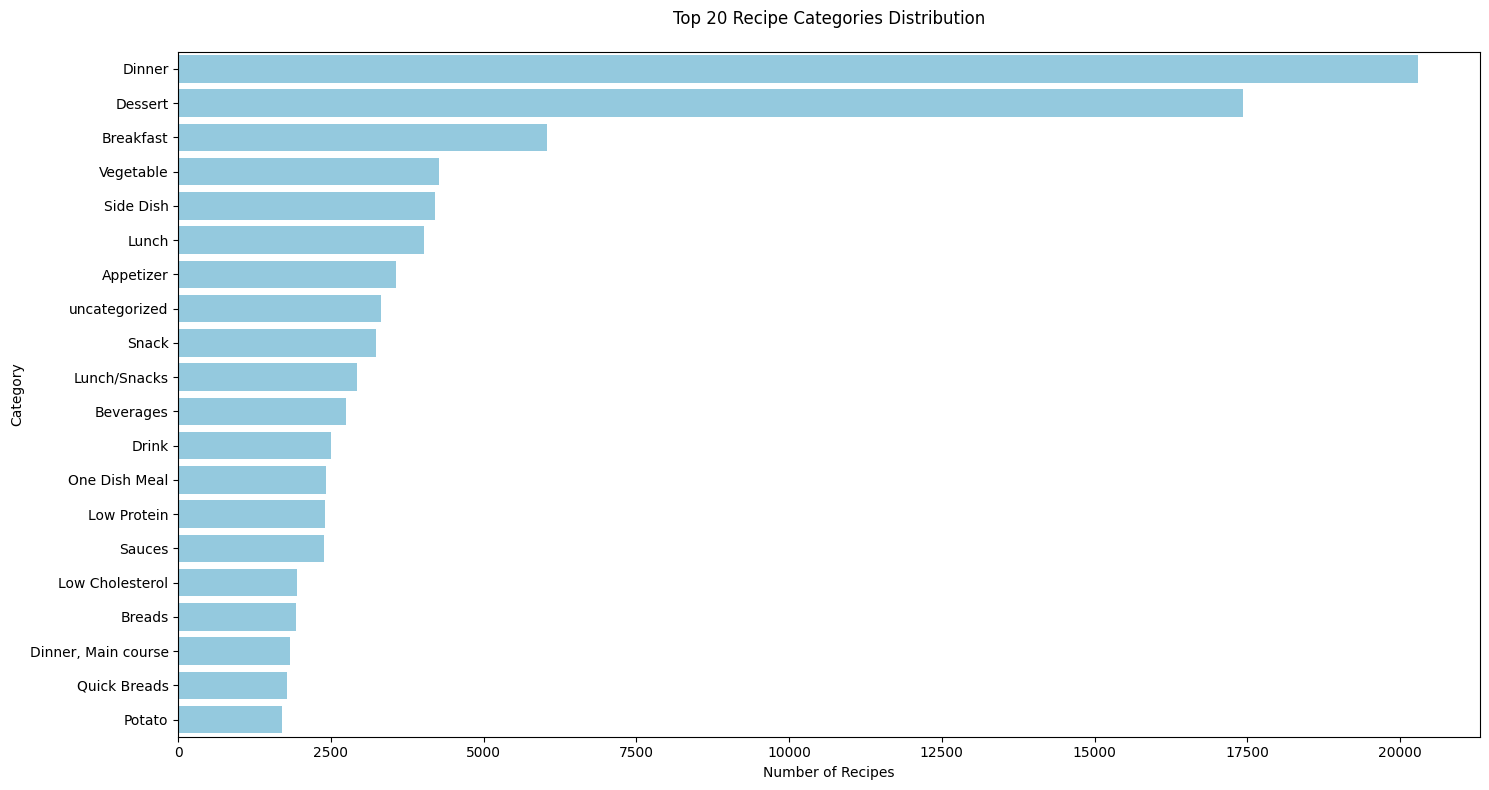

In [13]:
# Get category counts
category_counts = df['category'].explode().value_counts()

# Take top 20 categories for better visualization
top_20_categories = category_counts.head(20)

# Create the plot with larger figure size and adjusted parameters
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20_categories.values, 
            y=top_20_categories.index,  # Flip axes by using y for categories
            color='skyblue',
            orient='h')  # Horizontal orientation

plt.title('Top 20 Recipe Categories Distribution', pad=20)
plt.xlabel('Number of Recipes')
plt.ylabel('Category')

# Adjust layout
plt.tight_layout()
plt.show()

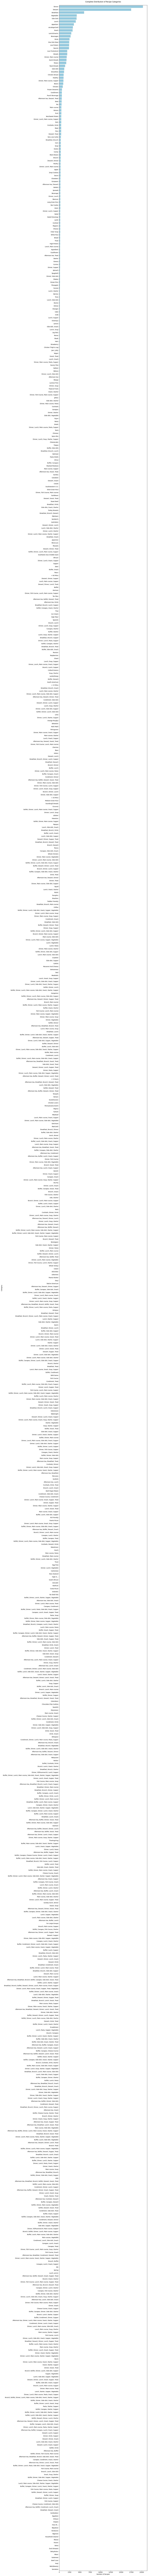

In [14]:
# For full distribution with scrollable figure
plt.figure(figsize=(15, len(category_counts)*0.3))  # Adjust height based on number of categories
sns.barplot(x=category_counts.values,
            y=category_counts.index,
            color='skyblue',
            orient='h')

plt.title('Complete Distribution of Recipe Categories', pad=20)
plt.xlabel('Number of Recipes')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

## Recipe Source Analysis

Analyzing recipe distribution across different sources:
- Vertical bar plot showing recipe count by source
- Labels rotated 45° for readability
- Shows which platforms contribute most recipes
- Helps identify dominant recipe sources in dataset

Note: Bar heights represent number of recipes from each source

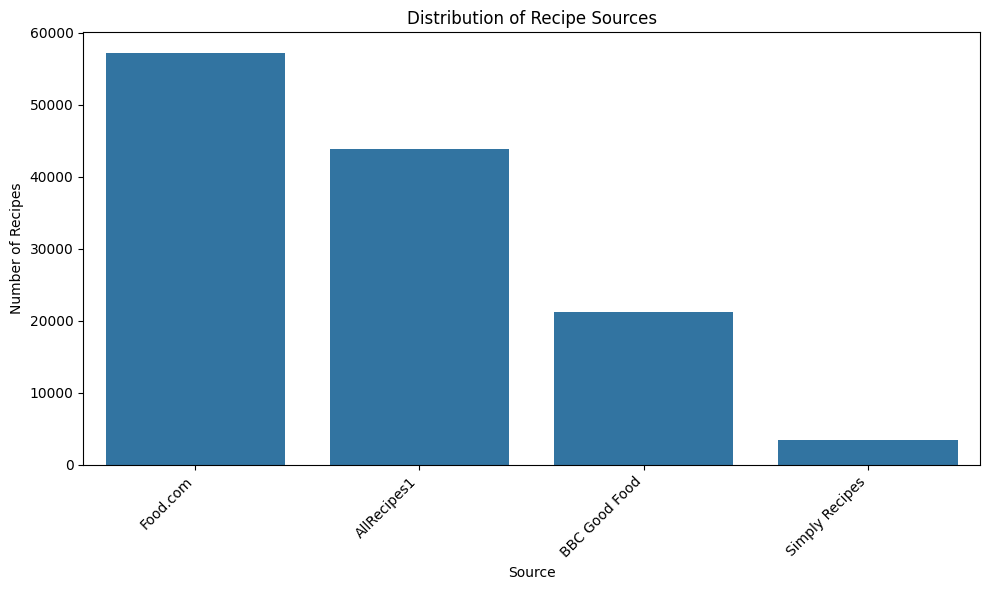

In [15]:
# 5. Source Distribution
plt.figure(figsize=(10, 6))
source_counts = df['source'].value_counts()
sns.barplot(x=source_counts.index, y=source_counts.values)
plt.title('Distribution of Recipe Sources')
plt.xlabel('Source')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation Analysis

Heatmap showing relationships between numerical features:
- Nutrients: calories, fat, protein, carbohydrates
- User Data: ratings, review counts
- Time Metrics: prep time, cook time

Features:
- Cool-warm color scheme (negative to positive correlations)
- Annotated correlation values
- 10x8 figure size for clarity

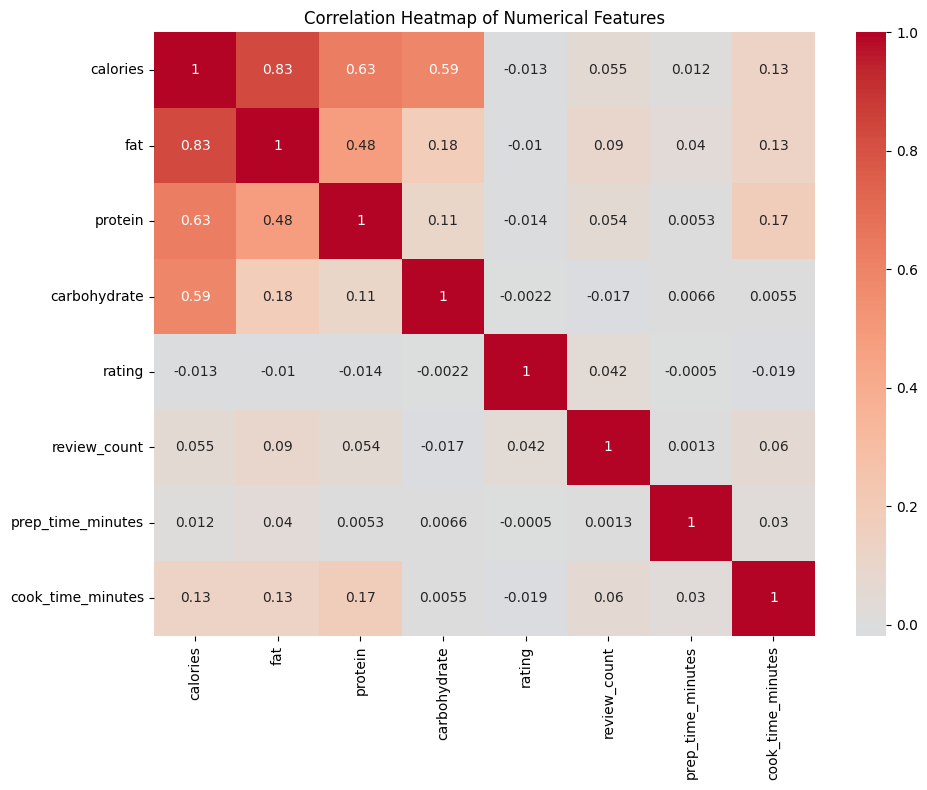

In [16]:
# 6. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_columns = ['calories', 'fat', 'protein', 'carbohydrate', 'rating', 'review_count', 'prep_time_minutes', 'cook_time_minutes']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

In [17]:
# Print some basic statistics
print("\nBasic Statistics:")
print(df[numeric_columns + ['prep_time_minutes', 'cook_time_minutes']].describe())


Basic Statistics:
            calories            fat        protein   carbohydrate  \
count  124599.000000  120740.000000  121128.000000  121373.000000   
mean      291.085405      11.934932      11.995641      33.693894   
std       197.548262      13.083652      13.161884      26.229857   
min         0.000000       0.000000       0.000000       0.000000   
25%       151.200000       3.000000       3.000000      15.400000   
50%       257.100000       8.000000       6.700000      30.000000   
75%       393.000000      16.000000      18.000000      47.000000   
max      6594.000000     437.900000     519.000000    2012.000000   

       prep_time_minutes  cook_time_minutes  
count       95432.000000       74572.000000  
mean           16.568363          36.597302  
std           104.554063          65.332459  
min             0.000000           0.000000  
25%            10.000000          15.000000  
50%            15.000000          20.000000  
75%            20.000000          40.

## Total Recipe Time Analysis

Detailed visualization of total recipe duration (prep + cook time):
- Limited to recipes under 3 hours
- 60 bins for detailed distribution view
- Mean and median lines for reference
- Summary statistics included

Key Features:
- Purple histogram with black edges
- Grid lines for readability
- Y-axis capped at 10,000 for detail
- Statistical overlay (mean/median)

Statistics printed:
- Total recipe count
- Mean, median times
- Time range (min to max)

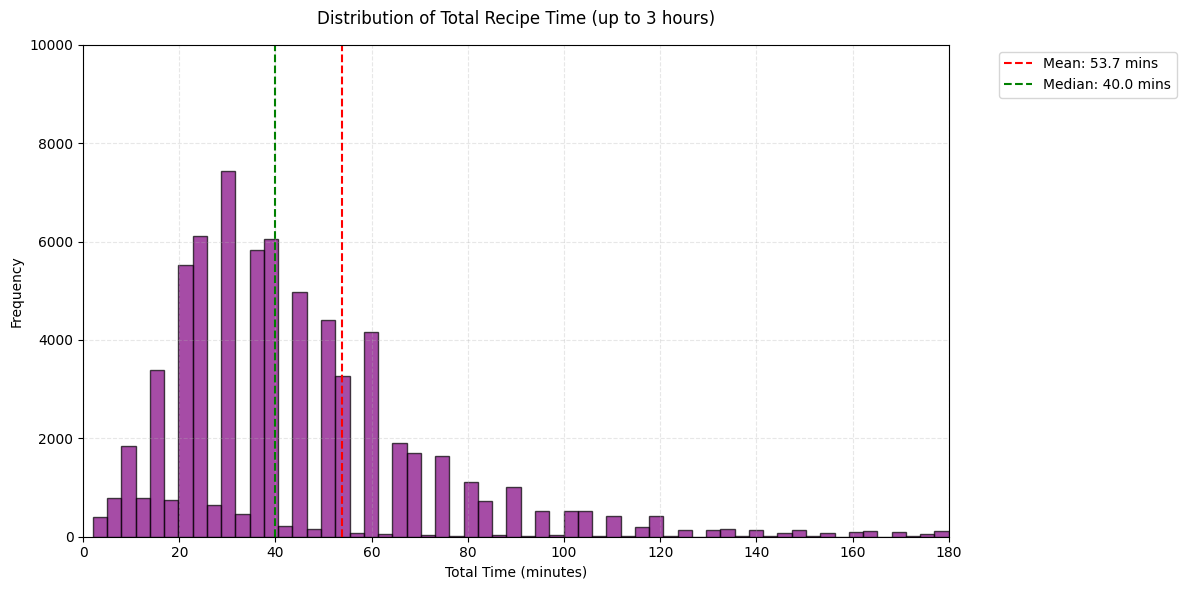

Number of recipes: 71775
Mean time: 53.7 minutes
Median time: 40.0 minutes
Min time: 2.0 minutes
Max time: 7245.0 minutes


In [18]:
# Calculate total time
df['total_time_minutes'] = df['prep_time_minutes'] + df['cook_time_minutes']

plt.figure(figsize=(12, 6))

# Create histogram with smaller bins and focus on more common durations
plt.hist(df['total_time_minutes'].dropna()[df['total_time_minutes'] <= 180],  # Filter to ≤ 180 minutes
         bins=60,  # More bins for finer detail
         color='purple', 
         edgecolor='black',
         alpha=0.7)

# Limit axes to show more detail
plt.xlim(0, 180)
plt.ylim(0, 10000)  # Adjust y-axis limit to show more detail

# Add title and labels
plt.title('Distribution of Total Recipe Time (up to 3 hours)', pad=15, fontsize=12)
plt.xlabel('Total Time (minutes)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

# Add grid for better readability
plt.grid(True, alpha=0.3, linestyle='--')

# Add mean and median lines
mean_time = df['total_time_minutes'].mean()
median_time = df['total_time_minutes'].median()
plt.axvline(mean_time, color='red', linestyle='--', label=f'Mean: {mean_time:.1f} mins')
plt.axvline(median_time, color='green', linestyle='--', label=f'Median: {median_time:.1f} mins')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()

plt.show()

# Optional: Print summary statistics
print(f"Number of recipes: {len(df['total_time_minutes'].dropna())}")
print(f"Mean time: {mean_time:.1f} minutes")
print(f"Median time: {median_time:.1f} minutes")
print(f"Min time: {df['total_time_minutes'].min():.1f} minutes")
print(f"Max time: {df['total_time_minutes'].max():.1f} minutes")

## Rating vs Reviews Analysis

Scatter plot examining relationship between ratings and review counts:
- X-axis: Number of reviews per recipe
- Y-axis: Rating value (1-5)
- Alpha=0.5 for better visibility of overlapping points
- Grid lines added for reference

Purpose: Visualizes if highly reviewed recipes tend to have different ratings

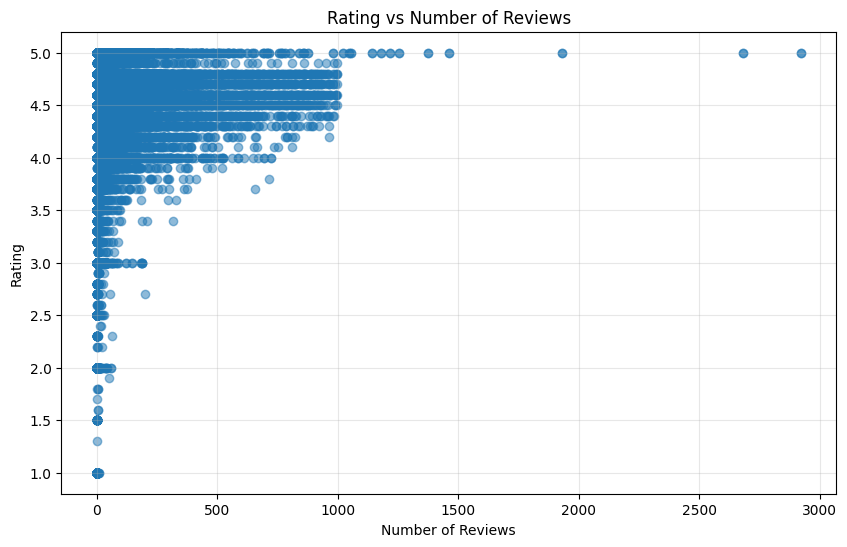

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df['review_count'], df['rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Rating vs Number of Reviews')
plt.grid(True, alpha=0.3)
plt.show()

## Category Calorie Analysis

Horizontal bar plot showing average calories across top 10 recipe categories:
- Categories sorted by average calorie content
- Helps identify high vs low calorie recipe types
- Shows caloric patterns across popular categories

Features:
- Horizontal orientation for better category readability
- Sorted bars for easy comparison
- 12x6 figure size for clear visualization

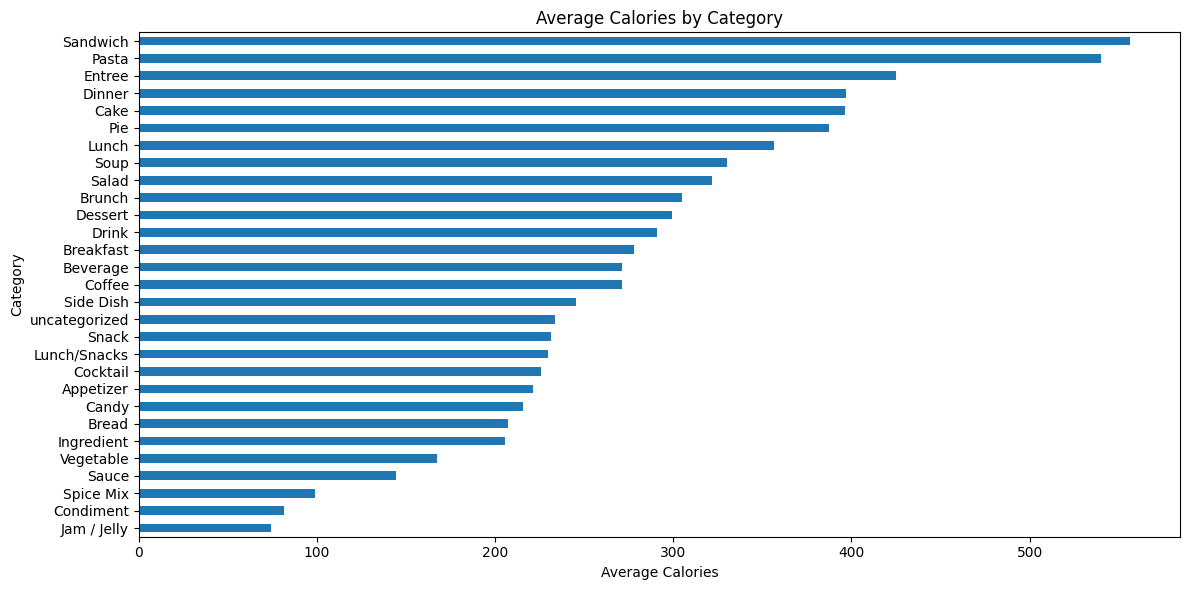

In [20]:
# Get top 10 categories
top_10_categories = df['category'].explode().value_counts().head(10).index

# Calculate mean calories for each category
category_calories = df[df['category'].apply(lambda x: any(cat in x for cat in top_10_categories))].explode('category')
category_mean_calories = category_calories.groupby('category')['calories'].mean().sort_values(ascending=True)

plt.figure(figsize=(12, 6))
category_mean_calories.plot(kind='barh')
plt.title('Average Calories by Category')
plt.xlabel('Average Calories')
plt.ylabel('Category')
plt.tight_layout()
plt.show()